<a href="https://colab.research.google.com/github/palakagl/LinearModels/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMA/GMMA/MMAI 869: Individual Assignment

Version 1: Updated September 27, 2021

- [Palak, Agrawal]
- [20310675]
- [Section A]
- [Blink: The Power of Thinking Without Thinking, Book by Malcolm Gladwell]
- [9th Jan 2022]

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [ ]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [ ]:
print(datetime.datetime.now())

2022-01-11 04:55:50.927611


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!python --version

Python 3.7.12


In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
pip install pattern

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descriptive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data 

In [ ]:
# Import libraries 
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot

import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [ ]:
# Default plot settings
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16


plt.rc('figure', figsize=[8.0, 5.0])     # controls the size of the figure
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', grid=True)

In [ ]:
# Understanding the Data
df1.shape
df1.info()
df1.describe().transpose()
df1.head()
df1.tail()

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


,Age,Income,SpendingScore,Savings
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445
504,89,30267,0.289310,14386.351880


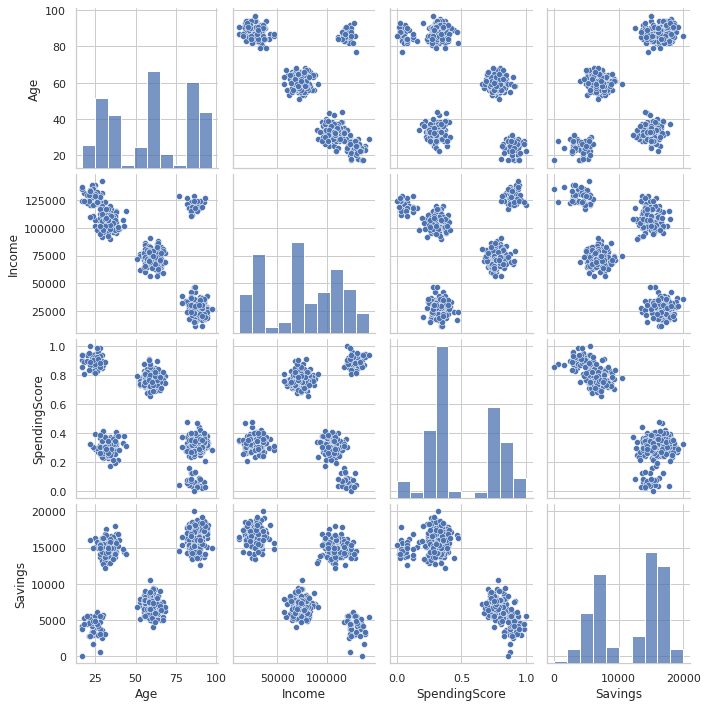

In [ ]:
# Exploratory data analysis, pair-plots
eda_features = [ 'Age',  'Income', 'SpendingScore', 'Savings']
sns.set(style='whitegrid',context = 'notebook')
sns.pairplot(df1[eda_features],height = 2.5,x_vars= eda_features,y_vars=eda_features)
plt.show()

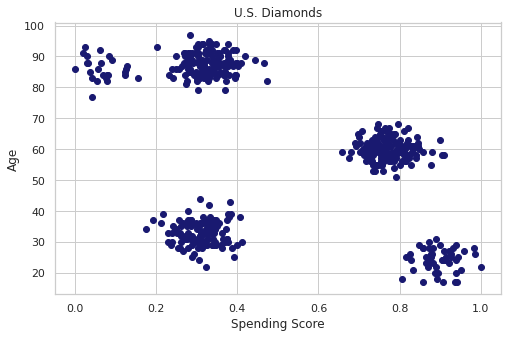

In [ ]:
# plotting the Raw Data 
plt.figure();

dfx1=df1['SpendingScore']
dfy1=df1['Age']
plt.scatter(dfx1, dfy1, c="midnightblue");
plt.title("U.S. Diamonds");
plt.xlabel('Spending Score');
plt.ylabel('Age');
plt.xticks();
plt.yticks();

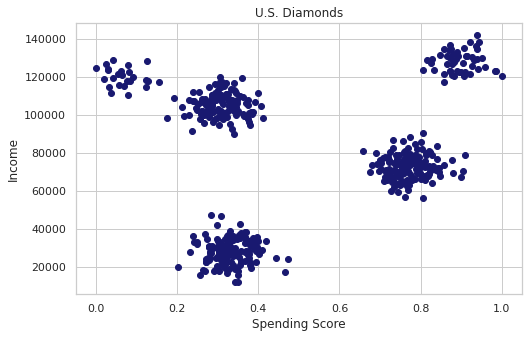

In [ ]:
# plot the raw data 
plt.figure();

dfx1=df1['SpendingScore']
dfy1=df1['Income']
plt.scatter(dfx1, dfy1, c="midnightblue");
plt.title("U.S. Diamonds");
plt.xlabel('Spending Score');
plt.ylabel('Income');
plt.xticks();
plt.yticks();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Age Log transformed')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Income Log transformed')

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Spending Score Log transformed ')

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Savings Log transformed')

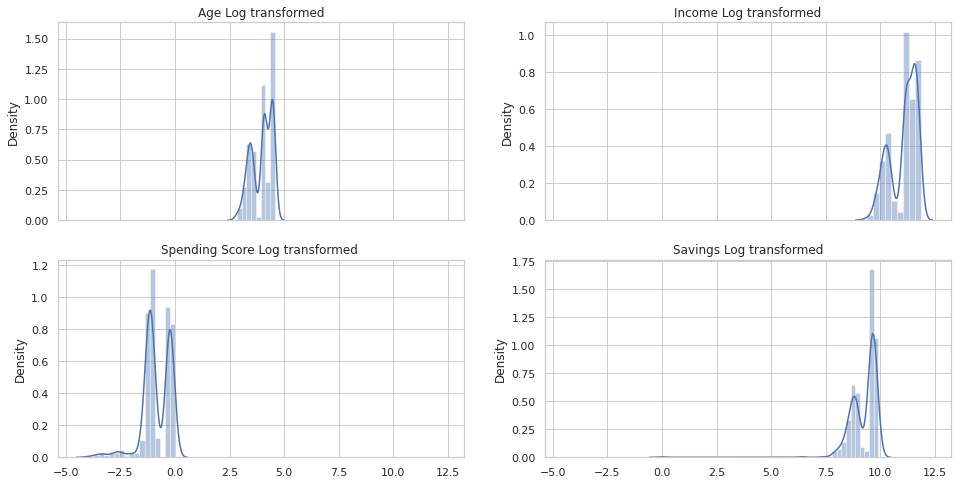

In [ ]:
# Checking the distribution of data and Log transformation
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16,8))
sns.distplot(np.log(df1['Age']), ax=axes[0,0]).set_title('Age Log transformed')
sns.distplot(np.log(df1['Income']), ax=axes[0,1]).set_title('Income Log transformed')
sns.distplot(np.where(df1['SpendingScore'] != 0, np.log(df1['SpendingScore']),0), ax=axes[1,0]).set_title('Spending Score Log transformed ')
sns.distplot(np.where(df1['Savings'] != 0, np.log(df1['Savings']),0), ax=axes[1,1]).set_title('Savings Log transformed')

In [ ]:
# Scaling the Features using Robust Scaler 
# scaler = RobustScaler()
# df1_scaled_data = scaler.fit_transform(df1)

In [ ]:
scaler = MinMaxScaler()
df1_scaled_data = scaler.fit_transform(df1)

## 1.1: Clustering Algorithm #1

### K-means Algorithm


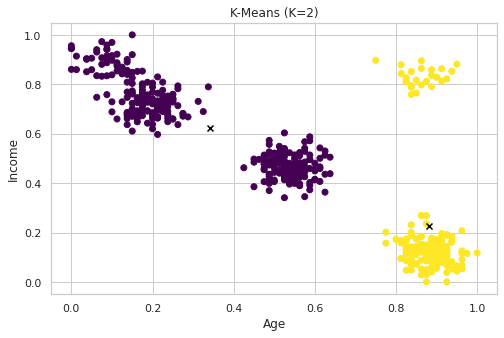

K=2, inertia=72.82, Sil=0.54, Cal_Har=528.79


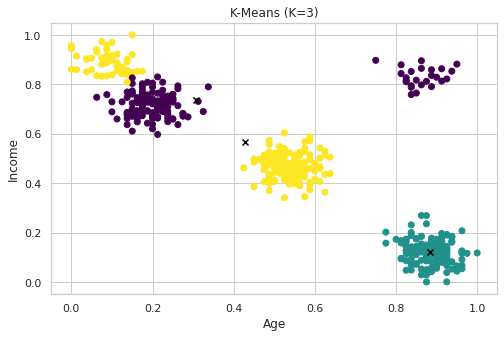

K=3, inertia=31.28, Sil=0.68, Cal_Har=947.44


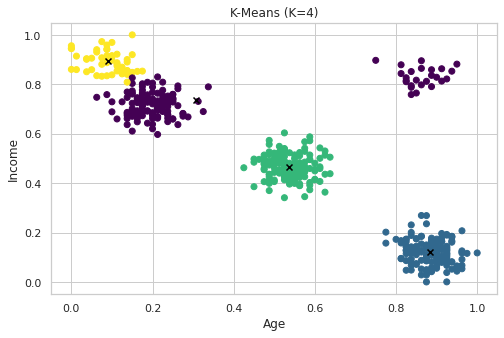

K=4, inertia=15.43, Sil=0.76, Cal_Har=1450.00


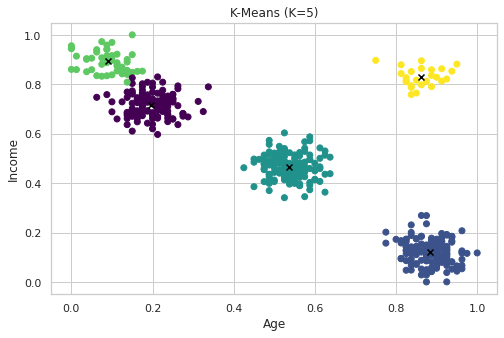

K=5, inertia=4.71, Sil=0.82, Cal_Har=3840.11


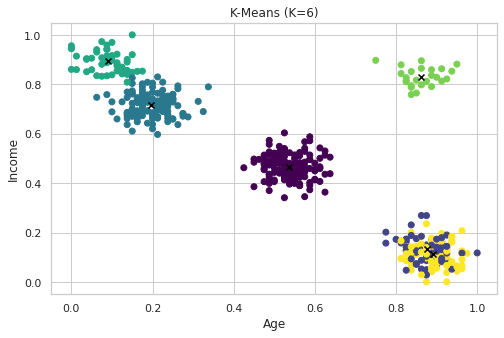

K=6, inertia=4.37, Sil=0.64, Cal_Har=3308.07


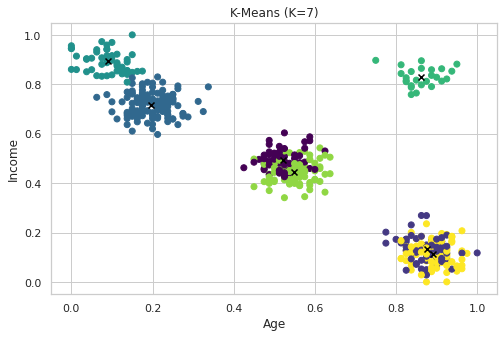

K=7, inertia=4.09, Sil=0.44, Cal_Har=2947.82


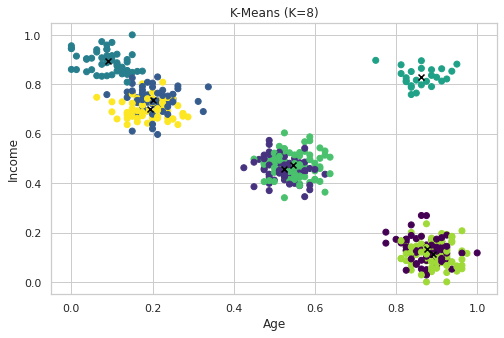

K=8, inertia=3.86, Sil=0.28, Cal_Har=2677.95


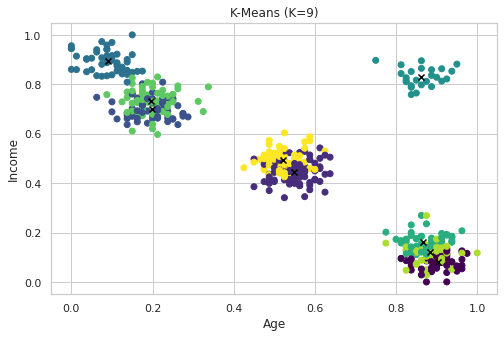

K=9, inertia=3.67, Sil=0.28, Cal_Har=2463.23


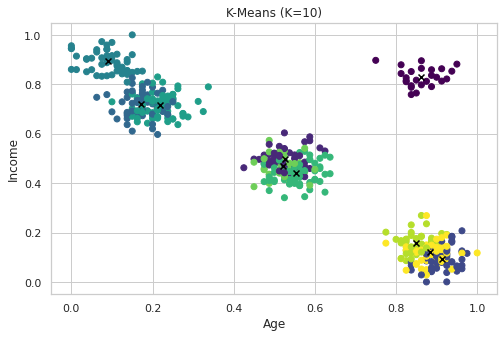

K=10, inertia=3.52, Sil=0.27, Cal_Har=2275.65


In [ ]:
silhouette_scores = []
inertia = []
calinski_harabasz_scores = []

# candidate values for our number of cluster
parameters = [2,3,4,5,6,7,8,9,10]

def do_kmeans(df1_scaled_data, k):
    global silhouette_scores
    global inertia
    global calinski_harabasz_scores

    #Run Kmeans algo with different cluster size
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10,tol=1e-04, random_state=42)
    k_means.fit(df1_scaled_data)

    #Just to understand, visualize different cluster sizes with Age vs Income graph
    pyplot.figure(figsize=(8, 5))
    pyplot.scatter(df1_scaled_data[:,0], df1_scaled_data[:,1], c=k_means.labels_,cmap= 'viridis')
    pyplot.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")
    pyplot.title("K-Means (K={})".format(k));
    pyplot.xlabel('Age');
    pyplot.ylabel('Income');
    pyplot.show()

    #Calculate inertia for each model and append to global variable
    inertia_score = k_means.inertia_    
    inertia.append(inertia_score)

    #Calculate silhouette score for each model and append to global variable
    sil = silhouette_score(df1_scaled_data, k_means.labels_)
    silhouette_scores += [sil]       # store all the scores

    #Calculate calinski_harabasz score for each model and append to global variable
    ch = calinski_harabasz_score(df1_scaled_data, k_means.labels_)
    calinski_harabasz_scores += [ch]       # store all the scores

    print("K={}, inertia={:.2f}, Sil={:.2f}, Cal_Har={:.2f}".format(k, inertia_score, sil,ch))

for k in parameters:
    do_kmeans(df1_scaled_data, k)


<Figure size 576x360 with 0 Axes>

<BarContainer object of 9 artists>

([<matplotlib.axis.XTick at 0x7fa3c203de90>,
 [Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10')])

Text(0.5, 1.0, 'Calinski-Harabasz Score')

Text(0.5, 0, 'Number of Clusters')

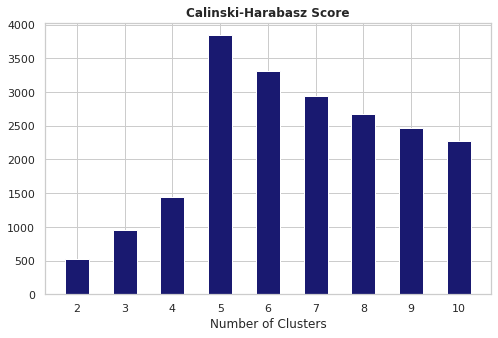

In [ ]:
# plotting calinski_harabasz_scores
pyplot.figure(figsize=(8, 5))
pyplot.bar(range(len(calinski_harabasz_scores)), list(calinski_harabasz_scores), align='center', color='midnightblue', width=0.5)
pyplot.xticks(range(len(calinski_harabasz_scores)), list(parameters))
pyplot.title('Calinski-Harabasz Score', fontweight='bold')
pyplot.xlabel('Number of Clusters')
pyplot.show()

<Figure size 576x360 with 0 Axes>

<BarContainer object of 9 artists>

([<matplotlib.axis.XTick at 0x7fa3c3aeb4d0>,
 [Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10')])

Text(0.5, 1.0, 'Silhouette Score')

Text(0.5, 0, 'Number of Clusters')

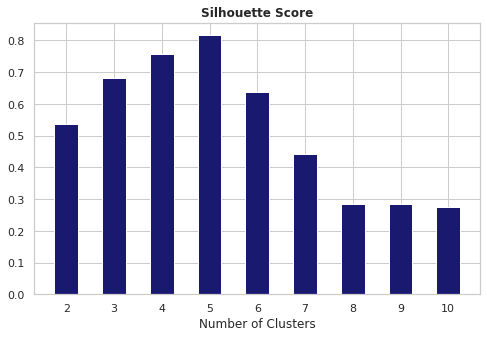

In [ ]:
# plotting silhouette score
pyplot.figure(figsize=(8,5))
pyplot.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='midnightblue', width=0.5)
pyplot.xticks(range(len(silhouette_scores)), list(parameters))
pyplot.title('Silhouette Score', fontweight='bold')
pyplot.xlabel('Number of Clusters')
pyplot.show()

In [ ]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init=10,tol=1e-04, random_state=42)
kmeans.fit(df1_scaled_data)

# Creating dataframe with cluster labels 
df1_KMeans_Clusters=pd.DataFrame(df1_scaled_data,columns=df1.columns)

df1_KMeans_Clusters['KMeans_ClusterID']=kmeans.labels_
df1_KMeans_Clusters['KMeans_ClusterID'].value_counts()

KMeans(n_clusters=5, random_state=42)

2    157
1    147
0    126
3     50
4     25
Name: KMeans_ClusterID, dtype: int64

In [ ]:
# Plotting Graph to visualize distribution of customers in different clusters
pie=df1_KMeans_Clusters.groupby('KMeans_ClusterID').size().reset_index()
pie.columns=['KMeans_ClusterID','value']
px.pie(pie,title='KMeans Clusters Distribution for K=5', values='value',names='KMeans_ClusterID',color=['blue','red','green','yellow','orange'])

In [ ]:
# Interpretation of Clusters
df1_KMeans_Clusters_copy=pd.DataFrame(df1.copy(),columns=df1.columns)
df1_KMeans_Clusters_copy['KMeans_ClusterID']=kmeans.labels_
df1_Cluster_Mean=df1_KMeans_Clusters_copy.groupby("KMeans_ClusterID").mean().reset_index()
df1_Cluster_Mean.head(20)

,KMeans_ClusterID,Age,Income,SpendingScore,Savings
0,0,32.777778,105265.809524,0.309926,14962.778066
1,1,87.775510,27866.102041,0.328800,16659.261445
2,2,59.955414,72448.063694,0.771518,6889.972190
3,3,24.180000,128029.120000,0.896892,4087.520309
4,4,86.000000,119944.040000,0.068378,14808.683793


In [ ]:
df1_Cluster_Mean_Melt=df1_KMeans_Clusters.groupby("KMeans_ClusterID").mean().reset_index()
df1_Cluster_Mean_Melt=pd.melt(df1_Cluster_Mean_Melt,id_vars=["KMeans_ClusterID"],var_name='Feature',value_name='Value')
df1_Cluster_Mean_Melt.head(20)

,KMeans_ClusterID,Feature,Value
0,0,Age,0.197222
1,1,Age,0.884694
2,2,Age,0.536943
3,3,Age,0.089750
4,4,Age,0.862500
5,0,Income,0.717429
6,1,Income,0.122047
7,2,Income,0.464985
8,3,Income,0.892532
9,4,Income,0.830339


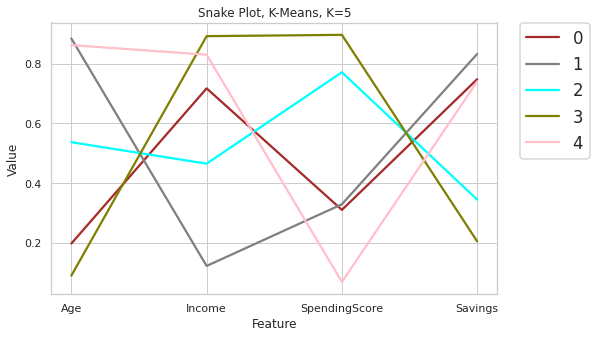

In [ ]:
# Snakeplot
pyplot.figure(figsize=(8,5))
pyplot.title('Snake Plot, K-Means, K=5');
sns.set_context("talk");
sns.lineplot(x="Feature", y="Value", hue='KMeans_ClusterID', data=df1_Cluster_Mean_Melt, legend="full",palette=['brown', 'gray','cyan','olive','pink'] );
pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

## 1.2: Clustering Algorithm #2

### DBSCAN Algorithm

eps=0.09, min_samples=7, n_clusters=6, sil=0.7865508787829819


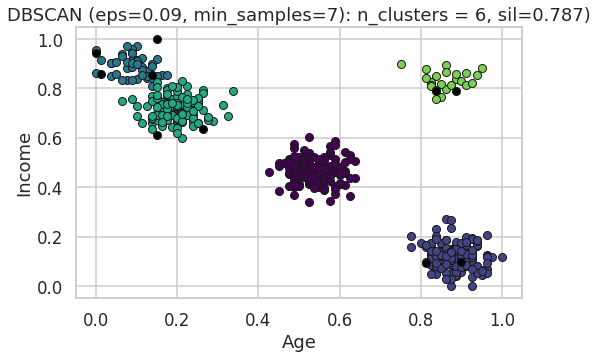

eps=0.1, min_samples=8, n_clusters=6, sil=0.807053637580285


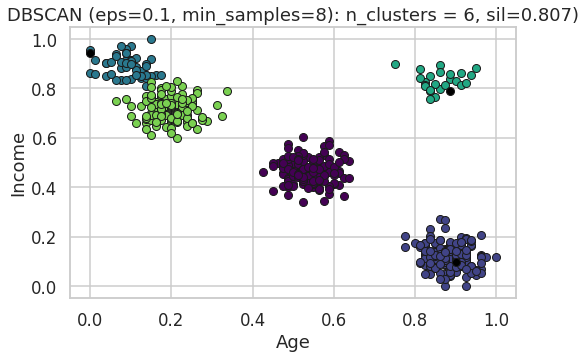

eps=0.13, min_samples=8, n_clusters=5, sil=0.8156911152768872


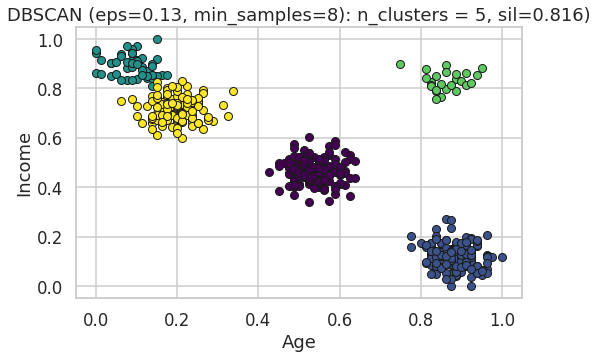

eps=0.14, min_samples=7, n_clusters=5, sil=0.8156911152768872


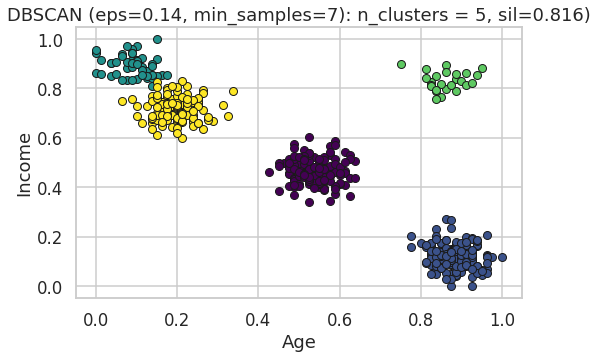

eps=0.12, min_samples=7, n_clusters=6, sil=0.7816868884447269


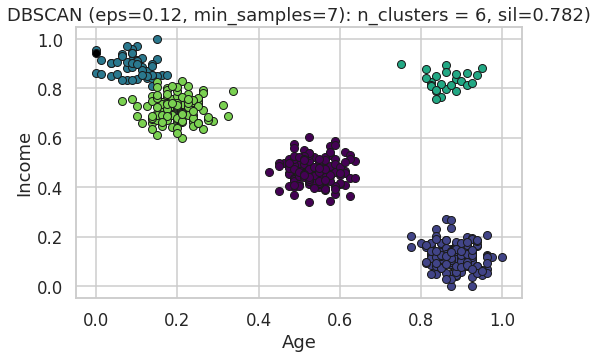

eps=0.36, min_samples=8, n_clusters=5, sil=0.8156911152768872


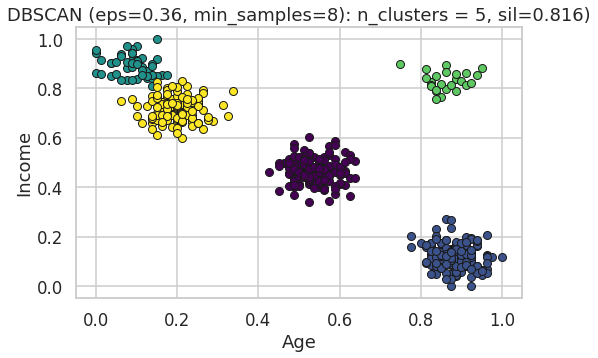

In [ ]:
def do_and_plot_dbscan(df1_scaled_data, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(df1_scaled_data)

    unique_labels = set(db.labels_)
    n_clusters = len(unique_labels) 
    
    if n_clusters <= 1:
        sil = -1
    else:
        sil = silhouette_score(df1_scaled_data, db.labels_)
    
    print("eps={}, min_samples={}, n_clusters={}, sil={}".format(eps, min_samples, n_clusters, sil))
    
    pyplot.figure();
    
    colors = [pyplot.cm.viridis(each) for each in np.linspace(0, 1, len(unique_labels))];

    for k in unique_labels:
        if k == -1:      
            col = [0, 0, 0, 1]
        else:
            col = colors[k]

        dbscan_plot = df1_scaled_data[db.labels_ == k]
        pyplot.plot(dbscan_plot[:, 0], dbscan_plot[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8);


    pyplot.title('');
    pyplot.title("DBSCAN (eps={}, min_samples={}): n_clusters = {:d}, sil={:.3f})".format(eps, min_samples, n_clusters, sil));
    pyplot.xlabel('Age');
    pyplot.ylabel('Income');
    pyplot.show()


do_and_plot_dbscan(df1_scaled_data, 0.09, 7)
do_and_plot_dbscan(df1_scaled_data, 0.1, 8)
do_and_plot_dbscan(df1_scaled_data, 0.13, 8)
do_and_plot_dbscan(df1_scaled_data, 0.14, 7)
do_and_plot_dbscan(df1_scaled_data, 0.12, 7)
do_and_plot_dbscan(df1_scaled_data, 0.36, 8)

Text(0.5, 0, 'Points')

Text(0, 0.5, 'Distance')

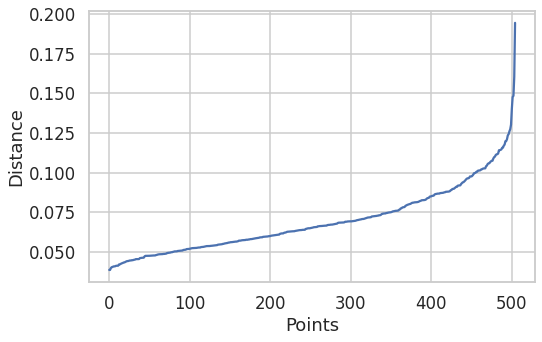

In [ ]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=9)
neighbors = nearest_neighbors.fit(df1_scaled_data)
distances, indices = neighbors.kneighbors(df1_scaled_data)
distances = np.sort(distances[:,8], axis=0)
fig = pyplot.figure(figsize=(8, 5))
pyplot.plot(distances)
pyplot.xlabel("Points")
pyplot.ylabel("Distance")
pyplot.savefig("Distance_curve.png", dpi=300)

In [ ]:
# From above parameter exploration and elbow method using nearestneighbour, we can conclude that eps=0.13 and min_samples=8 will give best silhouette scores with 5 clusters
db = DBSCAN(eps=0.13, min_samples=8).fit(df1_scaled_data)
labels = db.labels_
print('labels: ', labels)

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)
sil=silhouette_score(df1_scaled_data, db.labels_)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
print('DBSCAN Silhouette Score-',sil)

labels:  [0 0 0 0 1 2 0 1 1 1 3 4 4 4 0 3 0 1 1 3 4 3 0 1 3 2 2 0 1 0 0 0 1 0 4 0 1
 0 4 4 0 1 2 0 0 2 3 2 4 0 1 4 2 1 0 1 4 1 1 1 1 1 1 0 0 0 1 2 2 0 0 4 1 1
 4 0 4 0 0 2 0 3 0 1 1 4 4 0 0 0 0 0 2 1 0 2 4 0 0 4 4 2 4 2 4 1 1 4 4 0 1
 4 0 4 4 4 0 4 2 1 4 1 1 1 4 3 0 1 0 0 4 0 4 0 2 1 3 2 0 4 1 0 0 2 0 2 0 3
 0 1 0 4 1 0 1 3 4 0 1 0 4 1 0 4 1 4 1 0 4 0 1 0 4 0 1 0 0 1 1 1 0 0 4 2 2
 1 4 0 0 0 4 1 0 0 0 1 2 4 1 1 1 4 0 4 0 4 0 1 2 0 1 1 1 1 0 1 4 2 4 1 0 0
 4 1 4 2 4 0 0 1 0 0 1 0 0 0 4 0 4 4 2 0 0 0 3 0 4 1 2 2 2 1 0 4 1 1 4 4 0
 0 3 0 0 1 0 1 4 2 0 4 1 0 1 1 4 0 1 1 0 0 1 4 4 3 4 1 1 4 3 1 1 2 0 4 4 0
 4 1 1 4 0 4 1 0 4 2 0 1 4 4 1 3 3 0 1 4 0 0 1 4 1 4 1 4 1 1 4 1 4 0 4 0 0
 4 4 1 1 2 2 4 1 2 1 3 0 0 0 1 1 4 4 3 4 3 0 4 2 1 0 1 2 0 1 1 0 1 4 0 3 4
 4 0 1 1 1 1 1 4 4 1 0 4 0 3 1 1 0 1 1 0 1 1 4 1 0 4 2 4 0 1 4 0 0 0 1 4 2
 4 0 4 0 0 2 4 3 2 4 4 1 0 1 4 1 4 0 0 1 3 4 1 4 0 0 4 0 1 0 4 0 1 0 1 2 4
 4 2 4 4 1 1 0 2 0 4 4 3 2 4 2 1 4 4 0 4 1 1 2 0 4 0 0 4 0 0 0 1 4 4 0 0 0
 1 4 1 1 1 1 2 1

In [ ]:
# We will attach cluster labels as new column in original dataset. Then, using groupBy cluster label and mean values of each feature, we can try to interpret behaviour of different customer groups.
df1_DBSCAN_Clusters=pd.DataFrame(df1.copy(),columns=df1.columns)
df1_DBSCAN_Clusters['DBSCAN_ClusterID']=db.labels_
df1_DBSCAN_Clusters_mean=df1_DBSCAN_Clusters.groupby("DBSCAN_ClusterID").mean().reset_index()
df1_DBSCAN_Clusters_mean.head(5)

,DBSCAN_ClusterID,Age,Income,SpendingScore,Savings
0,0,59.955414,72448.063694,0.771518,6889.972190
1,1,87.775510,27866.102041,0.328800,16659.261445
2,2,24.180000,128029.120000,0.896892,4087.520309
3,3,86.000000,119944.040000,0.068378,14808.683793
4,4,32.777778,105265.809524,0.309926,14962.778066


In [ ]:
# Plotting Graph to visualize distribution of customers in different clusters
pie_chart=df1_DBSCAN_Clusters.groupby('DBSCAN_ClusterID').size().reset_index()
pie_chart.columns=['DBSCAN_ClusterID','value']
px.pie(pie_chart,title='DBSCAN Clusters Distribution', values='value',names='DBSCAN_ClusterID',color=['blue','red','green','yellow','orange'])

## 1.3 Model Comparison

### **Best Model for USD:**
Client - Uncle Steve's Diamond (USD)

For Uncle Steve Diamond Company data we have used two clustering algorithm –> Kmeans and DBSCAN. 
Silhouette score for Kmeans - 0.82
Silhouette score for DBSCAN - 0.81

However, we would pick Kmeans as the best algorithm because
1. It is easy to interpret
2. It is easy to implement and scalable
3. It is fast comparing to DBSCAN

In [ ]:
df1_Cluster_Mean

,KMeans_ClusterID,Age,Income,SpendingScore,Savings
0,0,32.777778,105265.809524,0.309926,14962.778066
1,1,87.775510,27866.102041,0.328800,16659.261445
2,2,59.955414,72448.063694,0.771518,6889.972190
3,3,24.180000,128029.120000,0.896892,4087.520309
4,4,86.000000,119944.040000,0.068378,14808.683793


## 1.4 Personas

###**Interpreting the Personas:**
Both the algorithms predicted 5 clusters as optimum number of clusters for Uncle Steve's Diamond company

---

1.  Cluster 0 - [Age - 32;	Income-105,265.00; Spending Score - 0.30; Savings - 	14,962.00]

**Persona => Economical -** This is a group of youngster with good income and good savings with average spending score, they are very economical people think a lot before buying anything.

2.  Cluster 1 - [Age - 87;	Income-27,866.00; Spending Score - 0.32; Savings - 	16,659.00] 

**Persona => Frugal -** Old people group with quite low income. Eventhough they have high savings their Spending score is pretty average.


3.  Cluster 2 - [Age - 59;	Income-72,448.00; Spending Score - 0.77; Savings - 	6,889.00] 

**Persona => General Audience**- They are ideal Audience, because this is the largest group and they have good spending score

4.  Cluster 3 - [Age - 24;	Income-128,029.00; Spending Score - 0.89; Savings - 	4,087.00] 

**Persona => Young Spendthrift**-This is our highest spending score group, our premium customer, probably we can offer them early sales preview. To gain their trust and make them loyal customers 

5.  Cluster 4 - [Age - 86;	Income-119,944.00; Spending Score - 0.06; Savings - 	14,808.00] 

**Persona =>  Boring Retiree**- This is old age group with very less spending score and the most smallest cluster.

# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 

**{Women Hygiene Products} -> {Chocolates}**

Reason: Women buy hygiene products regularly, and Everyone buys chocolates. Both of the products are high selling products. Women during their menstrual cycle tend to eat lots of chocolates for their mood swings. Thus, this rule has high support and high confidence.

## 2.2: A rule that might have reasonably high support but low confidence.

**{Joint Pain Medicine} -> {Adult Diapers}**
 
Reason: Joint pain medicine and adult diapers are relatively good selling products. An old-age person buying Joint pain medicine might need an adult diaper too. Thereupon this rule has high support but low confidence. 

## 2.3: A rule that might have low support and low confidence.

**{Hamburger Meat} -> {Sour Cream}**
 
Reason: Hamburger Meat and Sour Cream are standard selling products. If someone is buying Hamburger Meat and Sour Cream from Grocery Store, they are probably looking for a few different meals options for the week, and not many people buy them together. Hence this rule has low support and low confidence. 

## 2.4: A rule that might have low support and high confidence.

**{Flowers, Greeting Card} -> {Wines}**
 
Reason: Flowers and Greeting Card are not frequently sold items. But whenever someone buys flowers and greeting cards, they are likely to purchase Wine with it to celebrate the occasion or as part of the Gift. Therefore this rule has low support but high confidence. 


# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [ ]:
# Import Libraries
import re
from datetime import date
import dateutil
from sklearn.preprocessing import RobustScaler
from dateutil.relativedelta import relativedelta 
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from category_encoders import JamesSteinEncoder
from sklearn.compose import make_column_transformer
from category_encoders.wrapper import PolynomialWrapper
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from pattern.text.en import singularize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


## 3.1: Baseline model

In [ ]:
seed_value= 96743 
random.seed(seed_value)
np.random.seed(seed_value)

# Data Transformation
X_train['Sex'] = X_train['Sex'].map(dict(M=1, F=0))
X_test['Sex'] = X_test['Sex'].map(dict(M=1, F=0))

cat_features = ['City', 'Purpose']
num_features = ['Sex', 'PreviousDefault',	'NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Amount', 'Married', 'Duration']

encoding = PolynomialWrapper(JamesSteinEncoder(sigma = 0.1))
df_JS_features = encoding.fit_transform(X_train[cat_features],y_train)

# Merge the two dataframes: 
X_train_base = pd.concat([X_train[num_features], df_JS_features], axis=1)

In [ ]:
scores = {'precision' : make_scorer(precision_score),
          'recall' : make_scorer(recall_score), 
          'f1_score' : make_scorer(f1_score)}

model = RandomForestClassifier(random_state=42)

cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=4, random_state=42)
score_cv_data = cross_validate(model, X_train_base, y_train, cv=cv , scoring=scores, )

print('Cross Validation Mean Precision: %0.4f' %score_cv_data['test_precision'].mean())
print('Cross Validation Mean Recall: %0.4f' %score_cv_data['test_recall'].mean())
print('Cross Validation Mean F1-score: %0.4f' %score_cv_data['test_f1_score'].mean())

Cross Validation Mean Precision: 0.4852
Cross Validation Mean Recall: 0.2567
Cross Validation Mean F1-score: 0.3344


## 3.2: Feature engineering

In [ ]:
# Feature Engineering-1 - Age groups from Date of birth
X_train['Age_groups'] = pd.cut(X_train['DateOfBirth'].apply(lambda x: relativedelta(date.today(), dateutil.parser.parse(x)).years),
                        [0,39,44,49,54,np.inf],
                        labels = ['<=39','40-44','45-49','50-54','>=55'])

# Feature Engineering-2 - House type from Street addresses
X_train['House_type'] = X_train['Street'].apply(lambda x: singularize(re.sub("[^a-zA-Z\s+]", "", str(x).strip()).split()[-1]))

# Feature Engineering-3 - Amount bins from Credit amount
credit_score = ['Very low', 'Low', 'Moderate', 'High', 'Very high']
X_train['Amount_bins'] = pd.qcut(X_train['Amount'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=credit_score)

# Feature Engineering-4 - Length of License number plate
X_train['LicensePlate_len'] = X_train['LicensePlate'].apply(lambda x: len(re.sub("[^0-9a-zA-Z]", "", str(x))))

cat_features = ['City', 'Purpose', 'House_type', 'Age_groups', 'Amount_bins']
num_features = ['Sex', 'PreviousDefault',	'NumberPets', 'PreviousAccounts', 'ResidenceDuration', 'Married', 'Duration','LicensePlate_len', 'Amount']

In [ ]:
# Encoding Categorical Features
encoding = PolynomialWrapper(JamesSteinEncoder(sigma = 0.1))
df_JS_features = encoding.fit_transform(X_train[cat_features],y_train)

# Scaling Numerical Features
scaler = RobustScaler()
scaled_array = scaler.fit_transform(X_train[num_features]) 
scaled_df = pd.DataFrame(scaled_array, columns = num_features, index=X_train.index)

# Merge the two dataframes : 
X_train_FeaEng = pd.concat([scaled_df, df_JS_features], axis=1)

In [ ]:
model = RandomForestClassifier(random_state=42)

score_FeaEng = cross_validate(model,X_train_FeaEng, y_train, cv=cv , scoring=scores)

print('Cross Validation Mean Precision: %0.4f' %score_FeaEng['test_precision'].mean())
print('Cross Validation Mean Recall: %0.4f' %score_FeaEng['test_recall'].mean())
print('Cross Validation Mean F1-score: %0.4f \n' %score_FeaEng['test_f1_score'].mean())

Cross Validation Mean Precision: 0.6988
Cross Validation Mean Recall: 0.5461
Cross Validation Mean F1-score: 0.6121 



## 3.3: Feature selection

In [ ]:
# Recursive Feature Elimination
final_f1_score = 0
selected_features = []
for i in range(14, 5, -1):
  rfe_selector = RFE(estimator=model,n_features_to_select = i, step = 1)
  rfe_selector.fit(X_train_FeaEng, y_train)
  selected_features_list = list(X_train_FeaEng.columns[rfe_selector.get_support()])
  score_FeaEng_cv = cross_validate(model,X_train_FeaEng[selected_features_list], y_train, cv = cv , scoring=scores)
  print(set(X_train_FeaEng.columns) - set(selected_features_list))

  if score_FeaEng_cv['test_f1_score'].mean() > final_f1_score:
    final_f1_score = score_FeaEng_cv['test_f1_score'].mean()
    selected_features = selected_features_list
  print('Cross Validation Mean F1-score: %0.4f \n' %score_FeaEng_cv['test_f1_score'].mean())

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=14)

set()
Cross Validation Mean F1-score: 0.6121 



RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=13)

{'PreviousDefault'}
Cross Validation Mean F1-score: 0.6133 



RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=12)

{'Sex', 'PreviousDefault'}
Cross Validation Mean F1-score: 0.6168 



RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=11)

{'Married', 'Sex', 'PreviousDefault'}
Cross Validation Mean F1-score: 0.6138 



RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)

{'Married', 'Sex', 'PreviousDefault', 'LicensePlate_len'}
Cross Validation Mean F1-score: 0.6174 



RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=9)

{'NumberPets', 'Married', 'LicensePlate_len', 'Sex', 'PreviousDefault'}
Cross Validation Mean F1-score: 0.6170 



RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=8)

{'PreviousDefault', 'PreviousAccounts', 'NumberPets', 'Married', 'Sex', 'LicensePlate_len'}
Cross Validation Mean F1-score: 0.6110 



RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=7)

{'Duration', 'PreviousDefault', 'PreviousAccounts', 'NumberPets', 'Married', 'Sex', 'LicensePlate_len'}
Cross Validation Mean F1-score: 0.6185 



RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=6)

{'Duration', 'PreviousDefault', 'PreviousAccounts', 'NumberPets', 'Married', 'Purpose_1.0', 'Sex', 'LicensePlate_len'}
Cross Validation Mean F1-score: 0.6110 



In [ ]:
score_FeaEng_cv = cross_validate(model,X_train_FeaEng[selected_features], y_train, cv = cv , scoring=scores)

print('Cross Validation Mean Precision: %0.4f' %score_FeaEng_cv['test_precision'].mean())
print('Cross Validation Mean Recall: %0.4f' %score_FeaEng_cv['test_recall'].mean())
print('Cross Validation Mean F1-score: %0.4f \n' %score_FeaEng_cv['test_f1_score'].mean())

Cross Validation Mean Precision: 0.6847
Cross Validation Mean Recall: 0.5655
Cross Validation Mean F1-score: 0.6185 



## 3.4: Hyperparameter tuning

In [ ]:
# Model hyperparameters tunning using Gridsearch

from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

param_gridCV = {'n_estimators': [150, 175, 200, 250] }

grid_clf = GridSearchCV(model, param_gridCV, cv=7)
grid_clf.fit(X_train_FeaEng[selected_features], y_train)
best_model = grid_clf.best_estimator_

print(best_model)

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [150, 175, 200, 250]})

RandomForestClassifier(n_estimators=200, random_state=42)


In [ ]:
# Optimization on Selected features
score_FeaEng_cv = cross_validate(best_model,X_train_FeaEng[selected_features], y_train, cv = cv , scoring=scores)

print('Cross Validation Mean precision: %0.4f' %score_FeaEng_cv['test_precision'].mean())
print('Cross Validation Mean recall: %0.4f' %score_FeaEng_cv['test_recall'].mean())
print('Cross Validation Mean f1-score: %0.4f \n' %score_FeaEng_cv['test_f1_score'].mean())

bestModel_FeaSelc = best_model.fit(X_train_FeaEng[selected_features], y_train)

Cross Validation Mean precision: 0.6846
Cross Validation Mean recall: 0.5658
Cross Validation Mean f1-score: 0.6185 



## 3.5: Performance estimation


 Test Data Results 

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       991
           1       0.67      0.49      0.57       209

    accuracy                           0.87      1200
   macro avg       0.78      0.72      0.74      1200
weighted avg       0.86      0.87      0.86      1200



<Figure size 500x300 with 0 Axes>

Text(0.5, -8.416666666666666, 'Predicted Values')

Text(16.58333333333333, 0.5, 'Actual Values')

Text(0.5, 1.0, 'Confusion Matrix for the Model')

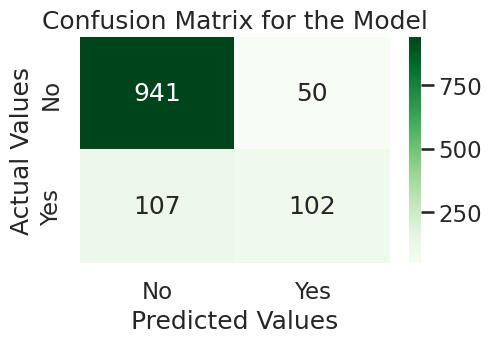

In [ ]:
# Applying Features Engineering on Test Dataset

# Feature Engineering-1 - Age groups from Date of birth
X_test['Age_groups'] = pd.cut(X_test['DateOfBirth'].apply(lambda x: relativedelta(date.today(), dateutil.parser.parse(x)).years),
                        [0,39,44,49,54,np.inf],
                        labels = ['<=39','40-44','45-49','50-54','>=55'])

# Feature Engineering-2 - House type from Street addresses
X_test['House_type'] = X_test['Street'].apply(lambda x: singularize(re.sub("[^a-zA-Z\s+]", "", str(x).strip()).split()[-1]))

# Feature Engineering-3 - Amount bins from Credit amount
credit_score = ['Very low', 'Low', 'Moderate', 'High', 'Very high']
X_test['Amount_bins'] = pd.qcut(X_test['Amount'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=credit_score)

# Feature Engineering-4 - Length of License number plate
X_test['LicensePlate_len'] = X_test['LicensePlate'].apply(lambda x: len(re.sub("[^0-9a-zA-Z]", "", str(x))))

# Encoding and Scaling on Test Data
df_JS_features_test = encoding.transform(X_test[cat_features])
scaled_array = scaler.transform(X_test[num_features])
scaled_df = pd.DataFrame(scaled_array, columns = num_features, index=X_test.index)

X_test_FeaEng = pd.concat([scaled_df, df_JS_features_test], axis=1)

# Model Prediction
y_pred = bestModel_FeaSelc.predict(X_test_FeaEng[selected_features])

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print('\n Test Data Results \n')
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(5,3), dpi=100)
ax = sns.heatmap(cm, annot = True, fmt='d', xticklabels = ["No", "Yes"], yticklabels = ["No", "Yes"], cmap="Greens")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix for the Model")
plt.show()

In [ ]:
# F1 Score on Test data
print(f1_score(y_test, y_pred, average='macro'))

0.7440492121090263


####                                     **F1-score Summary:**
| Steps        | F1-Score           |
| ------------- |------------|
| **Base Model**     | 0.334 |
| **Feature Engineering**   | 0.612 |
| **Feature Selection**   | 0.618 |
| **Hyperparameter Tuning**   | 0.618 |
| **Test Data**   | 0.744 |

# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



**Turbine Details-**

Total number of Turbines:     700

Cost of Fixing a Turbine: $ 20,000

Cost of Servicing a Turbine: $ 2,000

Cost of Inspecting a Turbine: $ 500

\

**Performance Matrics**


|         | RF Model           | RNN Model  |
| ------------- |------------------| -------------:|
| **Accuracy**      |  99%  |  99% |
| **Precision**   |  80% |  16% |
| **Recall**      |  78%  |  88% |
| **F1-Score**   |  79% |  27% |

\


**Cost Matrix-**

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------------| -------------:|
| **Actual Fail**      |  \$2,500.00  |  \$20,000 |
| **Actual No Fail**   |  \$500.00 |  \$0.00 |

\

**Maintenance Cost before ML Model-** 

Fixing at least 1 damaged turbines every two days for an year:

= $20,000.00 * (365/2)  = **\$3,650,000.00**

\

**Cost Matrix for Random Forest-**

Confusion Matrix for RF Model:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |


Cost Matrix for RF Model-

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | \$502,500.00 | \$1,100,000.00 |
| **Actual No Fail**   | \$25,000.00 | \$0.00 |

\
**Total Cost of RF Model** - \$502,500.00 + \$1,100,000.00 + \$25,000.00 = **\$1,627,500.00**

\

**Cost Matrix for Recurrent Neural Network-**

Confusion Matrix for RNN Model:


|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |

Cost Matrix for RNN Modle- 

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | \$565,000.00 | \$600,000.00 |
| **Actual No Fail**   | \$600,000.00 | \$0.00 |

\
**Total Cost of RNN Model** - \$565,000.00 + \$600,000.00 + \$600,000.00 = **\$1,765,000.00**

\

**Cost differences-** 

Cost incurred if No Model is used : $3,650,000.00

Cost incurred if RF Model is used :   $1,627,500.00

Cost incurred if RNN Model is used :  $1,765,000.00

Saving if RF Model is used : \$3,650,000.00 - $1,627,500.00 = \$2,022,500.00

Saving if RNN Model is used : \$3,650,000.00 - $1,765,000.00 = \$1,885,000.00

Saving if RF Model is used instead of RNN Model : \$2,022,500.00 - $1,885,000.00 = \$137,500.00

\
**Conclusion-**
As always, Uncle Steve was right. Random Forest is a better Model for Uncle Steve's Wind Farm as this will help me save more money than RNN Model. I would recommend that he should use Random Forest Model for this scenario.